[]()

[masinoa](https://github.com/masinoa/machine_learning/blob/master/02_Linear_Regression.ipynb)

In [1]:
%matplotlib inline

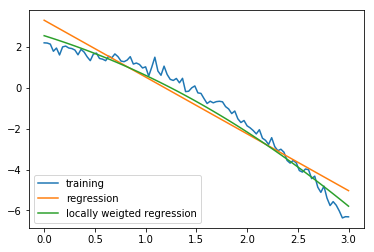

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg as la

seed = 123456789
np.random.seed(seed)


def generate_y(x, theta, inc_ran=True, mu=0, sigma=0.2): 
    y = 0
    for i in range(len(theta)): 
        y += theta[i]*(x**i)
    if inc_ran: 
        return y + np.random.normal(mu, sigma, x.shape)
    else: 
        return y

    
" generate data "
N = 100
x = np.linspace(0,3,N)
y = generate_y(x, [1.75, 0.25, -1.0])

" linear regression "
A = np.array([np.ones(N),x]).T
theta = la.inv(A.T @ A) @ A.T @ y 
y_pred = A@theta


def get_weights(x,x_i,tau=1): 
    return np.exp(-(x_i-x)**2/(2*tau**2))


def lwr(x_, x, y, A):
    N = A.shape[0]
    W = np.zeros((N,N))
    for i in range(N): 
        W[i,i] = get_weights(x_,x[i])    
    theta = la.inv(A.T@W@A)@A.T@W@y 
    return generate_y(x_,theta,inc_ran=False)


" locally weighted linear regression "
y_pred_lwr = [lwr(x_, x, y, A) for x_ in x] 

plt.plot(x,y)
plt.plot(x,y_pred)
plt.plot(x,y_pred_lwr)
plt.legend(('training','regression', 'locally weigted regression'),loc='lower left')
plt.show()